In [1]:
from plotnine import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

C:\Python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pg_mean= pd.read_csv("./data/pg_mean.csv")
BOD = pd.DataFrame({"Time":[1,2,3,4,5,7],'demand':[8.3,10.3,19.0,16.0,15.6,19.8]})
cabbage_exp = pd.read_csv("./data/cabbage_exp.csv")
diamonds = pd.read_csv("./data/diamonds.csv")
upc = pd.read_csv("./data/upc.csv")
csub = pd.read_csv("./data/csub.csv")
tophitters2001 = pd.read_csv("./data/tophitters2001.csv")
worldpop = pd.read_csv("./data/worldpop.csv")
ToothGrowth = pd.read_csv("./data/ToothGrowth.csv")
uspopage = pd.read_csv("./data/uspopage.csv")
climate = pd.read_csv("./data/climate.csv")
heightweight = pd.read_csv("./data/heightweight.csv")
biopsy = pd.read_csv("./data/biopsy.csv")
faithful = pd.read_csv("./data/faithful.csv")
countries = pd.read_csv("./data/countries.csv")

# Scatter Plot

## Basic Scatter Plot

In [26]:
hw = heightweight.copy()
hw['weightGroup']=hw['weightLb']>=100

In [29]:
hw['weightGroup'].replace({True:'>=100',False:'<100'},inplace=True)

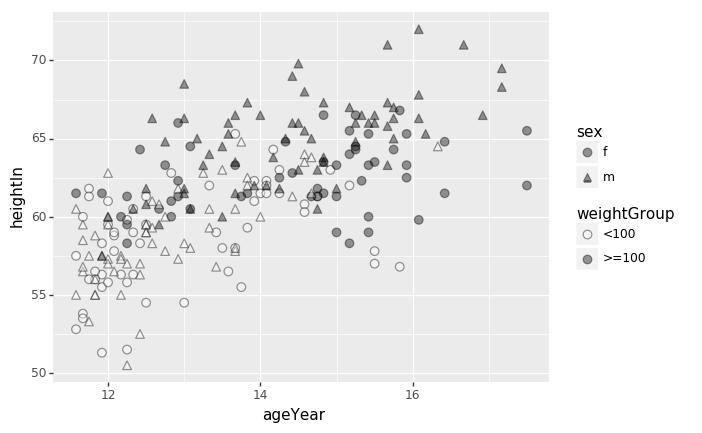

<ggplot: (116306253839)>

In [43]:
(ggplot(hw,aes('ageYear','heightIn',shape='sex',fill='weightGroup')) +
 geom_point(size=3,alpha=0.4) +
 scale_fill_manual(values=['white',"k"]) +
 scale_shape_manual(values=['o','^'])
)

## Mapping a Continuous Variable to Color or Size

scale_color_gradient() /scale_fill_gradient()  specifying the low and high colors

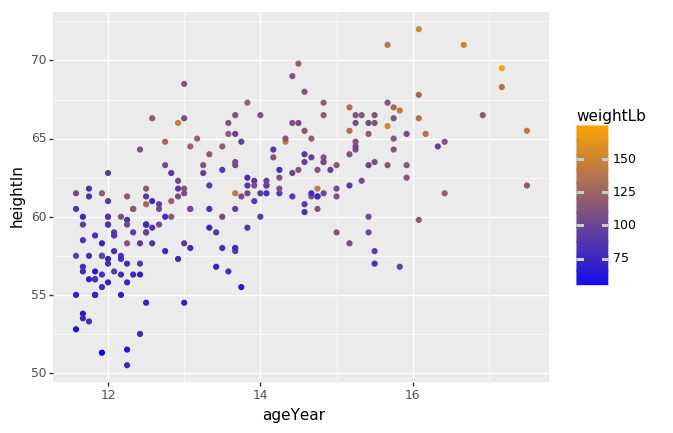

<ggplot: (-9223371920540514507)>

In [55]:
(ggplot(heightweight,aes('ageYear','heightIn',color='weightLb')) +
 geom_point() +
 scale_color_gradient(low='blue',high='orange')
)

scale_size_area()  # Make area proportional to numeric value

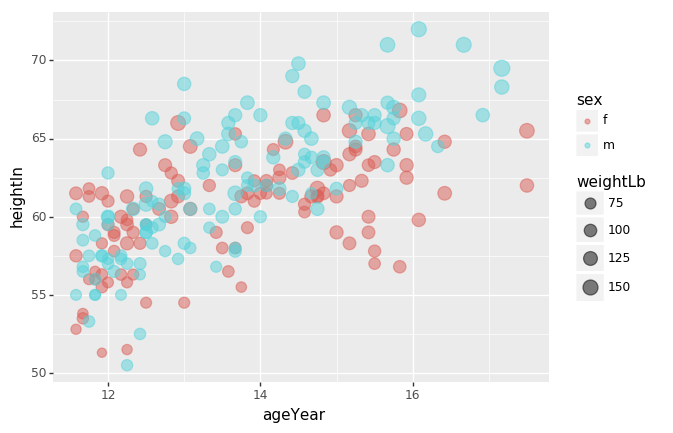

<ggplot: (-9223371920545769468)>

In [50]:
(ggplot(heightweight,aes('ageYear','heightIn',size='weightLb',color='sex')) +
 geom_point(alpha=0.5) +
 scale_size_area()
)

## Minimize Overplot

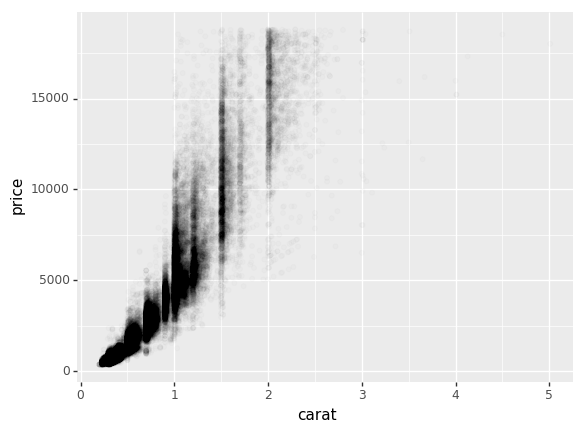

<ggplot: (116309612843)>

In [63]:
(ggplot(diamonds, aes(x='carat', y='price')) +
 geom_point(alpha=0.01)
)

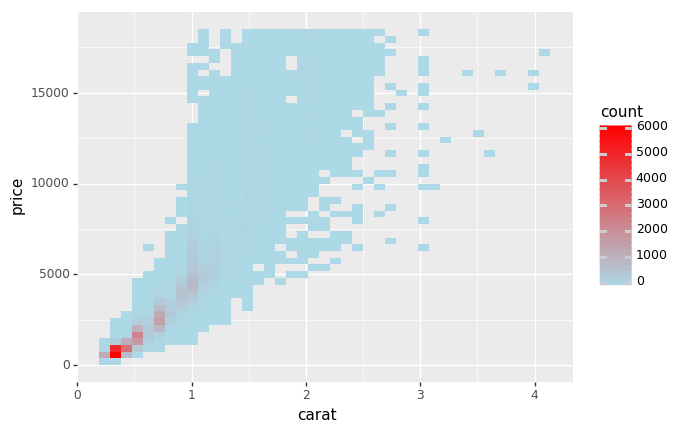

<ggplot: (-9223371920544117963)>

In [58]:
(ggplot(diamonds, aes(x='carat', y='price')) +
 stat_bin2d(bins=50) +
 scale_fill_gradient(low='lightblue',high='red',limits=[0,6000])
)

use jitter plot

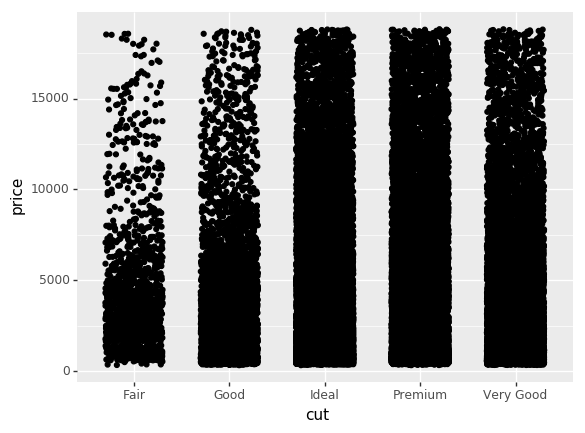

<ggplot: (-9223371920528421884)>

In [70]:
(ggplot(diamonds, aes(x='cut', y='price')) +
 geom_point(position=position_jitter(width=0.3,height=0,random_state=0))
)

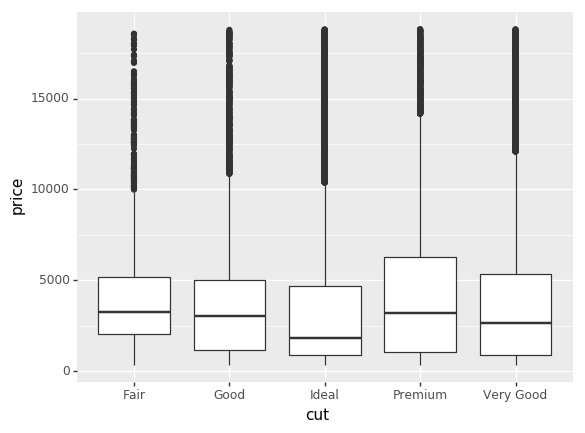

<ggplot: (116331257741)>

In [73]:
(ggplot(diamonds, aes(x='cut', y='price')) +
 geom_boxplot(aes(group='cut'))
)

## Adding Fitted Regression Model Lines + annotate

stat_smooth --- family= is not available

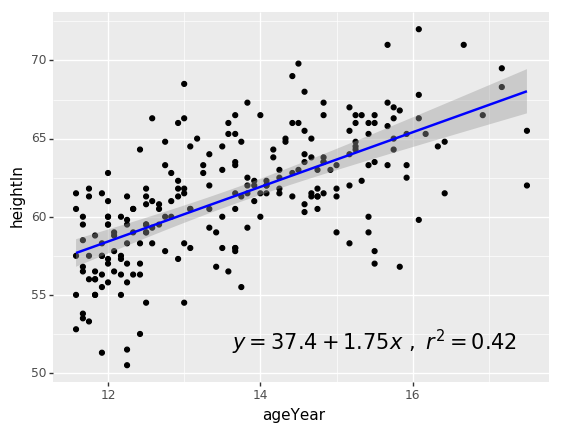

<ggplot: (-9223371883761162131)>

In [19]:
(ggplot(heightweight, aes(x='ageYear', y='heightIn')) +
 geom_point() +
 stat_smooth(method='lm',level=0.99,color='blue') +
 annotate('text',label=r"$y=37.4 + 1.75x \ , \  r^2=0.42$",x=15.5,y=52,size=15)
)

In [95]:
b=biopsy.copy()

In [100]:
b['classn']=b['class'].replace({'benign':0,'malignant':1})

C:\Python\lib\site-packages\plotnine\stats\smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


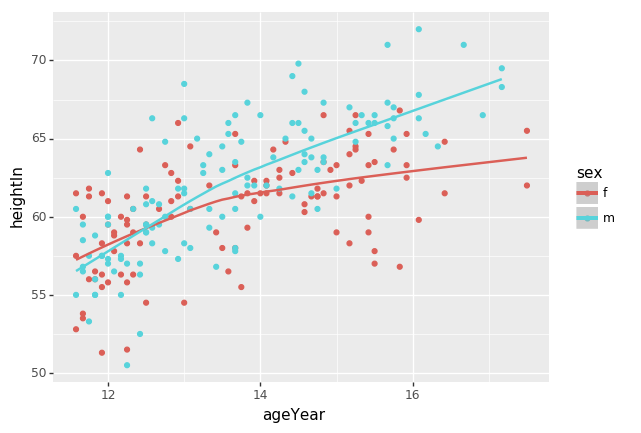

<ggplot: (116326388919)>

In [118]:
(ggplot(heightweight, aes(x='ageYear', y='heightIn',color='sex')) +
 geom_point() +
 geom_smooth(fullrange=True)
)

## Adding Fitted Lines from an Existing Model --- skip

page 94

## Marginal Rugs in Scatter Plot

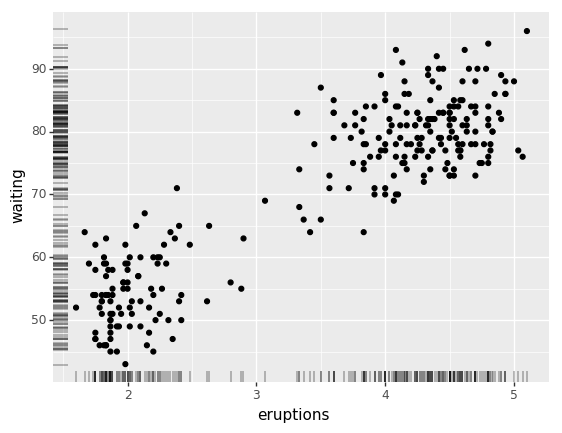

<ggplot: (-9223371883759654354)>

In [27]:
(ggplot(faithful,aes('eruptions','waiting')) +
 geom_point() +
 geom_rug(position='jitter',size=0.2)
)

## Labeling Points in a Scatter Plot

In [31]:
counties_sub = countries.query('Year==2009 and healthexp>2000').copy()

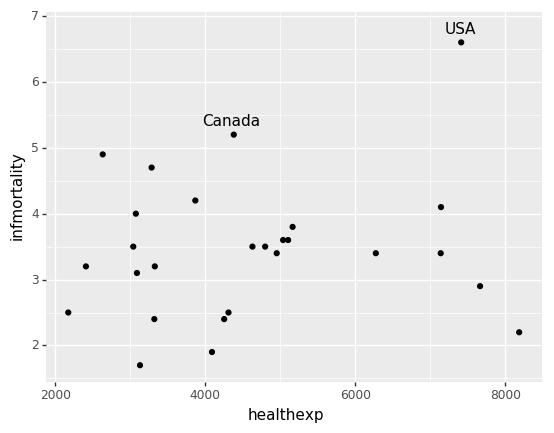

<ggplot: (-9223371883760923497)>

In [34]:
(ggplot(counties_sub,aes('healthexp','infmortality')) +
 geom_point() +
 annotate('text',x=4350,y=5.4,label='Canada') +
 annotate('text',x=7400,y=6.8,label='USA')
)

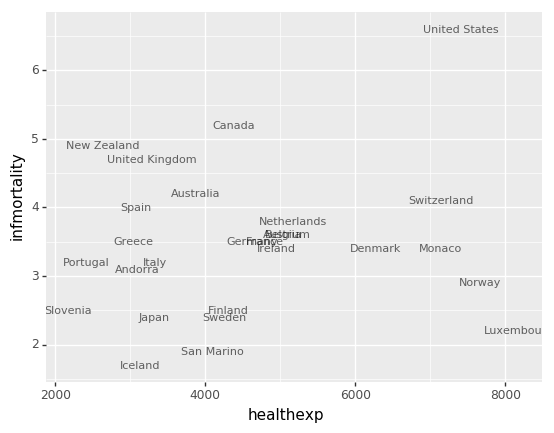

<ggplot: (153093685526)>

In [39]:
(ggplot(counties_sub,aes('healthexp','infmortality')) +
 geom_text(aes(label='Name'),size=8,alpha=0.6) 
)

In [48]:
name_list =  ["Canada", "Ireland", "United Kingdom", "United States",
"New Zealand", "Iceland", "Japan", "Luxembourg","Netherlands", "Switzerland"]
idx = counties_sub['Name'].apply(lambda x:x in name_list)
counties_sub['name1'] = counties_sub['Name']
counties_sub.loc[~idx,'name1'] = None

C:\Python\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_text : Removed 17 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


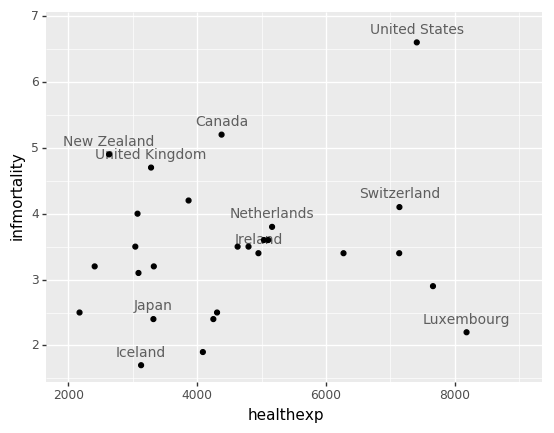

<ggplot: (-9223371883761749816)>

In [80]:
(ggplot(counties_sub,aes('healthexp','infmortality')) +
 geom_text(aes(label='name1'),size=10,alpha=0.6,nudge_y=0.2) +
 geom_point() +
 xlim(2000,9000)
)

## Balloon Plot

C:\Python\lib\site-packages\mizani\bounds.py:300: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
C:\Python\lib\site-packages\mizani\bounds.py:300: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])


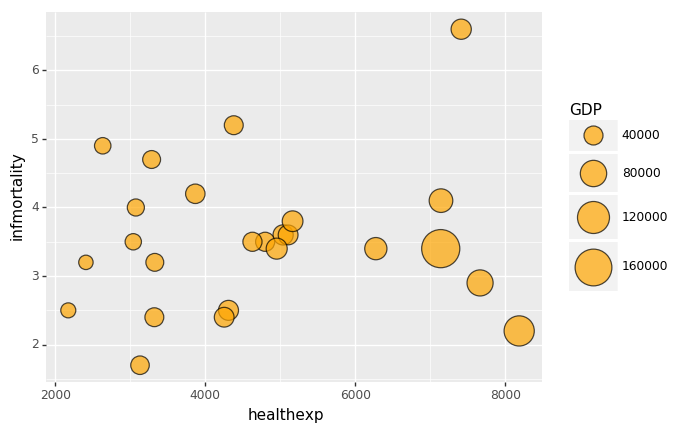

<ggplot: (-9223371883759626601)>

In [86]:
(ggplot(counties_sub,aes('healthexp','infmortality',size='GDP')) +
 geom_point(shape='o',color='black',fill='orange',alpha=0.7) +
 scale_size_area(max_size=15)
)
# if don't want the legend can use guide=False